In [1]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
import scanpy as sc
import decoupler as dc
import pandas as pd
import numpy as np
from loguru import logger

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('/home/mowp/workspace/mowp_scripts/tools')

import os
os.environ['R_HOME'] = '/home/mowp/mambaforge/envs/sc/lib/R'

import sctk

In [3]:
exp_data = '/data/user/mowp/data/supp/tcga/hnscc/TCGA.HNSC.sampleMap%2FHiSeqV2.gz'
meta_data = '/data/user/mowp/data/supp/tcga/hnscc/survival_HNSC_survival.txt'

In [4]:
adata = sctk.utils.Survival(
    exp_data, 
    meta_data,
    meta_index_col='sample')

In [5]:
adata

AnnData object with n_obs × n_vars = 566 × 20530
    obs: '_PATIENT', 'OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction'

In [6]:
adata.obs

,_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
TCGA-CR-7383-01,TCGA-CR-7383,1,521.0,1.0,521.0,1.0,454.0,1,454.0,NaN
TCGA-CR-7398-01,TCGA-CR-7398,0,156.0,0.0,156.0,0.0,156.0,0,156.0,NaN
TCGA-CV-A6JT-01,TCGA-CV-A6JT,0,852.0,0.0,852.0,0.0,852.0,0,852.0,NaN
TCGA-HD-8635-01,TCGA-HD-8635,0,695.0,0.0,695.0,0.0,695.0,0,695.0,NaN
TCGA-CR-6481-01,TCGA-CR-6481,0,311.0,0.0,311.0,NaN,NaN,0,311.0,NaN
...,...,...,...,...,...,...,...,...,...,...
TCGA-QK-A6VB-01,TCGA-QK-A6VB,0,641.0,0.0,641.0,NaN,NaN,1,613.0,NaN
TCGA-MT-A51X-01,TCGA-MT-A51X,0,242.0,0.0,242.0,NaN,NaN,0,242.0,NaN
TCGA-T3-A92N-01,TCGA-T3-A92N,1,95.0,1.0,95.0,NaN,NaN,1,46.0,NaN
TCGA-CR-6472-01,TCGA-CR-6472,0,1050.0,0.0,1050.0,NaN,NaN,0,1050.0,NaN


### gene

In [8]:
adata.group_meta(
    groupby='DKK1', 
    group_method='median',
    event='OS',
    time='OS.time')

Group Low: 282
Group High: 283
results.p_value=7.6109778464430016e-06
results.test_statistic=20.03318619587428


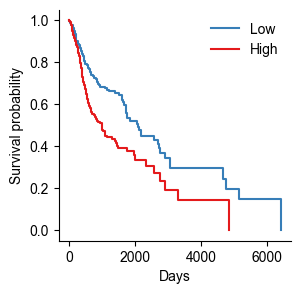

In [11]:
ax = adata.km_plot(xlabel='Days')

### gene signature

In [7]:
gene_list = ['FOXP3', 'CTLA4', 'CCR8', 'TNFRSF9']

adata.group_meta(
    groupby=gene_list, 
    group_method='median',
    event='OS',
    time='OS.time')

Group Low: 283
Group High: 282
results.p_value=0.0005264899678499308
results.test_statistic=12.019423064157133


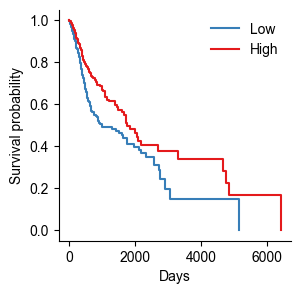

In [13]:
ax = adata.km_plot(xlabel='Days')

### set time limit

In [10]:
adata.obs['OS.time'] = adata.obs['OS.time'] / 30

In [11]:
gene_signatures ={
    'Cytotoxicity': ['GZMA', 'GZMB', 'PRF1', 'IFNG', 'NKG7'],
    'Exhaustion': ['PDCD1', 'HAVCR2', 'LAG3', 'CTLA4', 'TIGIT'],
    'Proliferation': ['MKI67', 'PCNA', 'TOP2A', 'CCNB1', 'CCNB2'],
}

Group Low: 232
Group High: 232
results.p_value=0.006393683402060335
results.test_statistic=7.4358591171370705
Group Low: 232
Group High: 232
results.p_value=0.007858241387735205
results.test_statistic=7.065499218645687
Group Low: 232
Group High: 232
results.p_value=0.5257542629734311
results.test_statistic=0.402590840997315


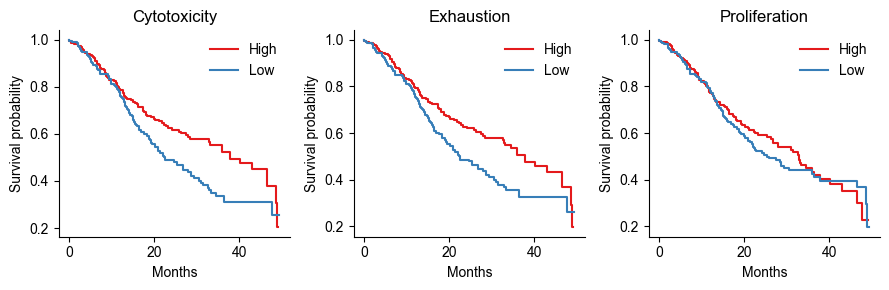

In [12]:
# Calculate the number of rows needed for subplots
n_clusters = len(gene_signatures)
n_cols = 3
n_rows = -(-n_clusters // n_cols)  # Ceiling division

# Create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows * 3))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate over clusters and their indices
for idx, cluster in enumerate(gene_signatures):
    genes = gene_signatures[cluster]
    adata.group_meta(
        groupby=genes, group_method='median', 
        event='OS', time='OS.time', time_limit=50)
    
    # Plot on the specific subplot axis
    adata.km_plot(ax=axes[idx], xlabel='Months')
    axes[idx].set_title(cluster)

# Hide any unused axes if the number of clusters is not a multiple of n_cols
for ax in axes[n_clusters:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()